In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [50]:
df['Month'] = pd.to_datetime(df['Month'])
#df['Year'] = pd.to_datetime(df['Year'])

In [51]:
df.head()

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West


In [52]:
grouped = df.groupby(['Year','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index()

In [53]:
grouped

,Year,Crime_type,Crime_ID
0,2019,Criminal damage and arson,441936
1,2019,Drug offences,149840
2,2019,Public order offences,340925
3,2019,Theft offences,1094973
4,2019,Violence and sexual offences,1516608
5,2020,Criminal damage and arson,427073
6,2020,Drug offences,169180
7,2020,Public order offences,391677
8,2020,Theft offences,965238
9,2020,Violence and sexual offences,1624924


In [54]:
crim = grouped[grouped.Crime_type == 'Criminal damage and arson']
crim['Crime_ID'] = (crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0]

<ipython-input-54-d40f0c623a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crim['Crime_ID'] = (crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0]


In [55]:
crim

,Year,Crime_type,Crime_ID
0,2019,Criminal damage and arson,0.000000
5,2020,Criminal damage and arson,-0.033632
10,2021,Criminal damage and arson,-0.154776


<AxesSubplot:xlabel='Year', ylabel='Crime_ID'>

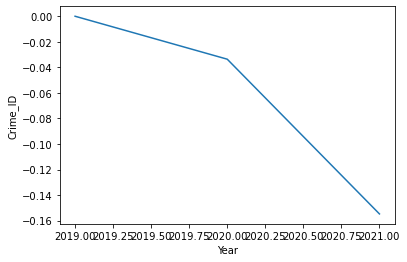

In [56]:
sns.lineplot(data=crim,x='Year',y='Crime_ID')

In [57]:
grouped2 = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped2 = grouped2.reset_index()
grouped2

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,36557
1,2019-01-01,Drug offences,10964
2,2019-01-01,Public order offences,23749
3,2019-01-01,Theft offences,93564
4,2019-01-01,Violence and sexual offences,116769
...,...,...,...
175,2021-12-01,Criminal damage and arson,19252
176,2021-12-01,Drug offences,4987
177,2021-12-01,Public order offences,14742
178,2021-12-01,Theft offences,42251


In [69]:
crim2 = grouped2[grouped2.Crime_type == 'Criminal damage and arson']
#crim2['Crime_ID'] = (crim2['Crime_ID']-crim2.Crime_ID[0])/crim2.Crime_ID[0]

In [85]:
crim2 = crim2.reset_index(drop=True)
crim2.Crime_ID[0] = crim2.Crime_ID[0:12].median()

<ipython-input-85-f31dd6005d3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crim2.Crime_ID[0] = crim2.Crime_ID[0:12].median()


In [89]:
np.arange(1,12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
crim2 = crim2.drop(np.arange(1,12),axis=0)

In [92]:
crim2
crim2['Crime_ID'] = (crim2['Crime_ID']-crim2.Crime_ID[0])/crim2.Crime_ID[0]
crim2

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,0.000000
12,2020-01-01,Criminal damage and arson,0.029750
13,2020-02-01,Criminal damage and arson,-0.089983
14,2020-03-01,Criminal damage and arson,0.014415
15,2020-04-01,Criminal damage and arson,-0.228304
16,2020-05-01,Criminal damage and arson,-0.144309
17,2020-06-01,Criminal damage and arson,-0.047498
18,2020-07-01,Criminal damage and arson,0.079118
19,2020-08-01,Criminal damage and arson,0.097028
20,2020-09-01,Criminal damage and arson,0.022083


In [68]:
crim2 = crim2.reset_index(drop=True)
crim2[0:12]

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,0.000000
1,2019-02-01,Criminal damage and arson,-0.063928
2,2019-03-01,Criminal damage and arson,0.006565
3,2019-04-01,Criminal damage and arson,-0.003775
4,2019-05-01,Criminal damage and arson,0.012583
5,2019-06-01,Criminal damage and arson,-0.028394
6,2019-07-01,Criminal damage and arson,0.030063
7,2019-08-01,Criminal damage and arson,0.012747
8,2019-09-01,Criminal damage and arson,-0.008945
9,2019-10-01,Criminal damage and arson,0.073584


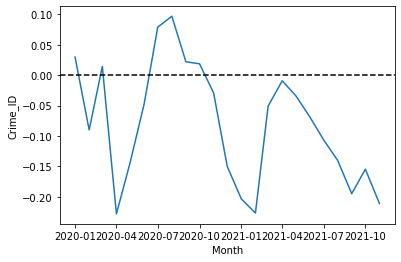

In [102]:
sns.lineplot(data=crim2[1:-1],x='Month',y='Crime_ID')
plt.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black')

Only works when using subplots or defining an axis.

In [204]:
def plotter(df_grouped,crime_type,ax=None,**kwargs):
    crim = df_grouped[df_grouped.Crime_type == crime_type]
    crim = crim.reset_index(drop=True)
    crim.loc[0,'Crime_ID'] = crim.Crime_ID[0:12].median()
    crim = crim.drop(np.arange(1,12),axis=0)
    crim['Crime_ID'] = (crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0]
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=crim[1:-1],x='Month',y='Crime_ID',ax=ax,**kwargs)
    ax.set_ylim(-0.5,0.5)
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return ax

In [183]:
crim2.loc[0,'Crime_ID']

0.0

In [206]:
#plotter(grouped2,'Criminal damage and arson')

These show the percentage difference of each month from the overall median value for 2019 for each crime type

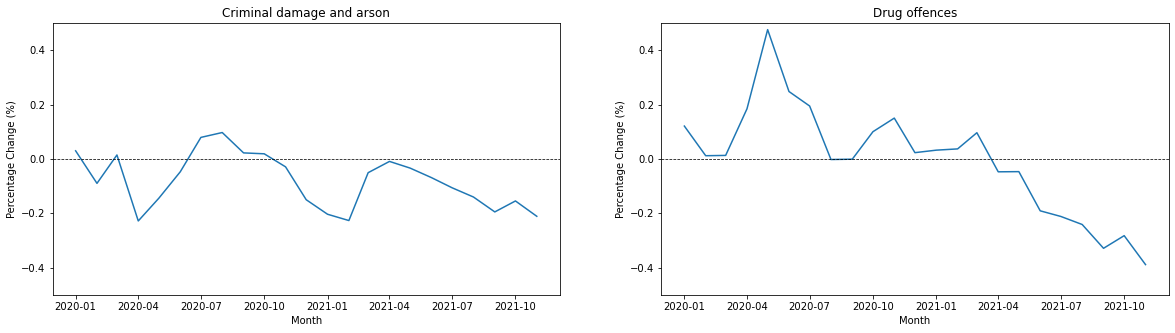

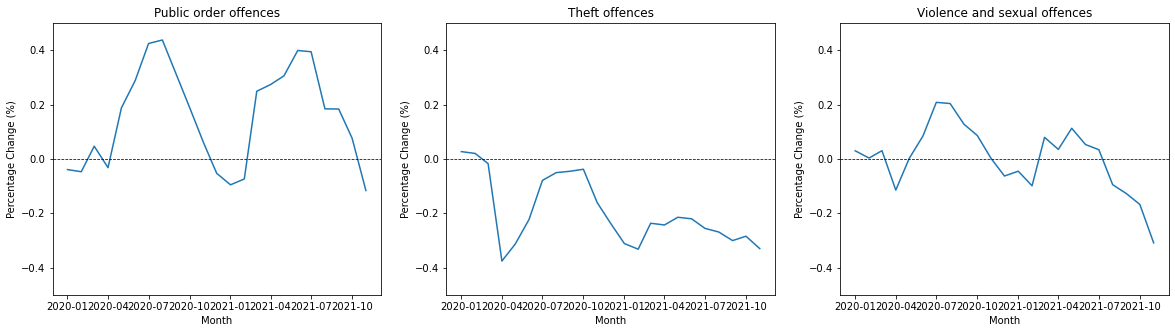

In [205]:
fig,(a1,a2) = plt.subplots(1,2,figsize=(20,5))
plotter(grouped2,'Criminal damage and arson',ax=a1)
plotter(grouped2,'Drug offences',ax=a2)
fig2,(a3,a4,a5) = plt.subplots(1,3,figsize=(20,5))
plotter(grouped2,'Public order offences',ax=a3)
plotter(grouped2,'Theft offences',ax=a4)
plotter(grouped2,'Violence and sexual offences',ax=a5)
plt.show()

In [219]:
crim3 = grouped2[grouped2.Crime_type == 'Criminal damage and arson'].reset_index(drop=True)
#crim3.Crime_ID.pct_change(12)

In [217]:
def plotter2(df_grouped,crime_type,ax=None,**kwargs):
    crim = df_grouped[df_grouped.Crime_type == crime_type]
    crim = crim.reset_index(drop=True)
    crim.loc[:,'Crime_ID'] = crim.Crime_ID.pct_change(12)
    crim = crim.drop(np.arange(0,12),axis=0)
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=crim[1:-1],x='Month',y='Crime_ID',ax=ax,**kwargs)
    ax.set_ylim(-0.5,0.5)
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return ax

These show the percentage difference from 12 months ago, e.g April 2020 compared to April 2019. 

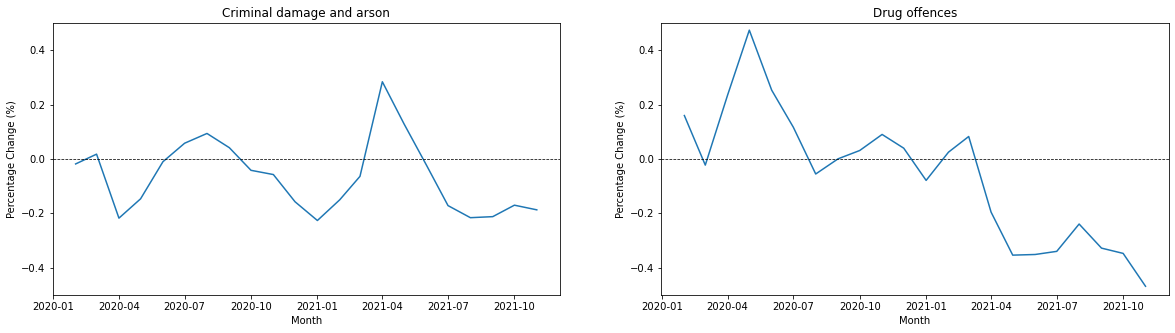

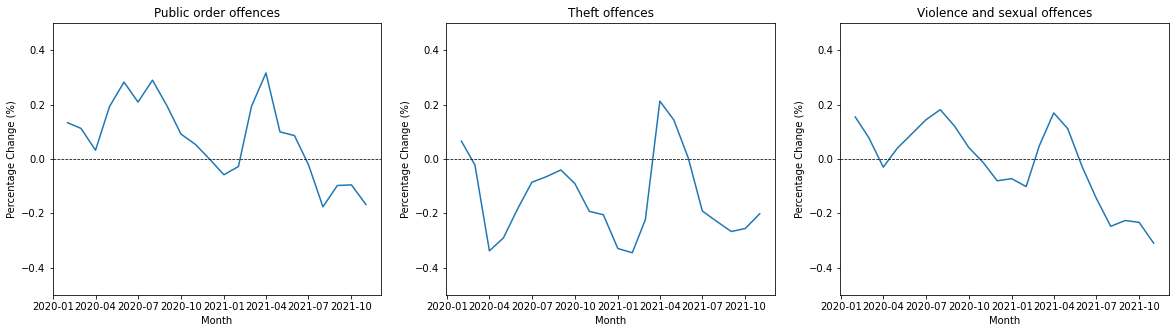

In [218]:
fig,(a1,a2) = plt.subplots(1,2,figsize=(20,5))
plotter2(grouped2,'Criminal damage and arson',ax=a1)
plotter2(grouped2,'Drug offences',ax=a2)
fig2,(a3,a4,a5) = plt.subplots(1,3,figsize=(20,5))
plotter2(grouped2,'Public order offences',ax=a3)
plotter2(grouped2,'Theft offences',ax=a4)
plotter2(grouped2,'Violence and sexual offences',ax=a5)
plt.show()